# Sentiment Mining

## Import Required Packages

In [1]:
import json
import matplotlib.pyplot as plt 
import string

from tqdm import tqdm_notebook as tqdm
from nltk import wordpunct_tokenize


In [2]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space

To download nltk corpora (This can take around 15 minutes).

In [3]:
# import nltk
# nltk.download()

## Constants for testing mode

In [4]:
train_path = 'data/train.json'
dev_path = 'data/dev.json'

## Read File Function

In [5]:
def read_file(path):
    data = []
    with open(path, 'r') as data_file:
        line = data_file.readline()
        while line:
            data.append(json.loads(line))
            line = data_file.readline()
    return data

## Import Dataset

In [6]:
def load_data(train_data_path,dev_data_path):
    train_set = read_file(train_data_path)
    dev_set = read_file(dev_data_path)
    return train_set,dev_set

The load step should take about 5 seconds.

In [7]:
train_set,dev_set = load_data(train_path,dev_path)

Reducing Size of data for testing purposes

In [8]:
# train_set = train_set[:10000]
# dev_set = dev_set[:2000]

## Tokenize Words

Try the following also :-
* Add features
    - All capitals
    - Position Tag on words
* Lemmatize
* Remove Stop Words and highly infrequent words
* tfidf based weighting

In [9]:
def correct_format(data):
    X = []
    Y = []
    for item in tqdm(data):
        Y.append(float(item['ratings']))
        X.append(wordpunct_tokenize(item['review'].translate(translator)))
    return X,Y

https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize

In [10]:
X_train,Y_train = correct_format(train_set)
X_dev, Y_dev = correct_format(dev_set)

Sanity Check

In [16]:
print('Rating ',Y_train[0])
print('Tokenized Review',X_train[0])
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer()
tokenizer.tokenize(X_train[0])

Rating  2.0
Tokenized Review ['Market', 'Co', 'is', 'a', 'beautiful', 'place', 'Every', 'is', 'well', 'designed', 'clean', 'and', 'shiny', 'new', 'But', 'for', 'us', 'it', 'was', 'lacking', 'Mainly', 'in', 'choice', 'They', 'bill', 'themselves', 'as', 'a', 'foodie', 'place', 'but', 'choice', 'is', 'very', 'limited', 'We', 'didn', 't', 'count', 'but', 'there', 's', 'maybe', 'a', 'dozen', 'vendors', 'in', 'total', 'several', 'of', 'those', 'being', 'restaurants', 'or', 'cafes', 'The', 'food', 'vendors', 'have', 'very', 'limited', 'selections', 'The', 'meat', 'vendor', 'probably', 'has', 'the', 'most', 'but', 'were', 'missing', 'several', 'things', 'we', 'd', 'expect', 'smoked', 'sausages', 'ground', 'lamb', 'pork', 'belly', 'Everything', 'seemed', 'to', 'be', 'good', 'quality', 'however', 'The', 'fish', 'monger', 'was', 'also', 'well', 'appointed', 'with', 'good', 'quality', 'stock', 'but', 'also', 'suffered', 'from', 'limited', 'selection', 'No', 'cheese', 'shop', 'though', 'the', 'butc

['Market',
 'Co',
 'is',
 'a',
 'beautiful',
 'place',
 'Every',
 'is',
 'well',
 'designed',
 'clean',
 'and',
 'shiny',
 'new',
 'But',
 'for',
 'us',
 'it',
 'was',
 'lacking',
 'Mainly',
 'in',
 'choice',
 'They',
 'bill',
 'themselves',
 'as',
 'a',
 'foodie',
 'place',
 'but',
 'choice',
 'is',
 'very',
 'limited',
 'We',
 'didn',
 't',
 'count',
 'but',
 'there',
 's',
 'maybe',
 'a',
 'dozen',
 'vendors',
 'in',
 'total',
 'several',
 'of',
 'those',
 'being',
 'restaurants',
 'or',
 'cafes',
 'The',
 'food',
 'vendors',
 'have',
 'very',
 'limited',
 'selections',
 'The',
 'meat',
 'vendor',
 'probably',
 'has',
 'the',
 'most',
 'but',
 'were',
 'missing',
 'several',
 'things',
 'we',
 'd',
 'expect',
 'smoked',
 'sausages',
 'ground',
 'lamb',
 'pork',
 'belly',
 'Everything',
 'seemed',
 'to',
 'be',
 'good',
 'quality',
 'however',
 'The',
 'fish',
 'monger',
 'was',
 'also',
 'well',
 'appointed',
 'with',
 'good',
 'quality',
 'stock',
 'but',
 'also',
 'suffered',
 'fr

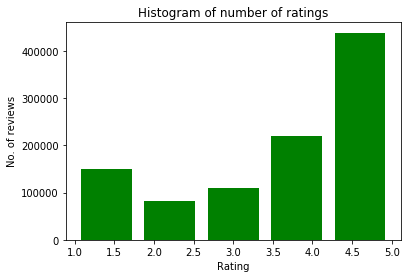

In [14]:
range = (1, 5) 
bins = 5

# plotting a histogram 
plt.hist(Y_train, bins, range, color = 'green', 
        histtype = 'bar', rwidth = 0.8) 
  
# x-axis label 
plt.xlabel('Rating') 
# frequency label 
plt.ylabel('No. of reviews') 
# plot title 
plt.title('Histogram of number of ratings') 
  
# function to show the plot 
plt.show() 

## Try Different Models

* SVM Classifier
* Random Forest
* Logistic Regression
    - L2 Norm
    - L1 Norm
* Try using existing models
    - SentiWordNet
    - General Inquirer